In [1]:
# https://towardsdatascience.com/heres-how-to-run-sql-in-jupyter-notebooks-f26eb90f3259
# https://www.sqlshack.com/learn-jupyter-notebooks-for-sql-server/
import sqlalchemy

# mssql+pyodbc://<username>:<password>@<dsnname>
username = 'mgadmin' 
password = 'WeDontSharePasswords1!' 

engine = sqlalchemy.create_engine("mssql+pyodbc://"+username+":"+password+"@dw")

In [2]:
%load_ext sql 

In [3]:
%sql mssql+pyodbc://mgadmin:WeDontSharePasswords1!@dw

'Connected: mgadmin@None'

In [4]:
%%sql
select *
from Plex.accounting_period ap 
where period_key = 45758

 * mssql+pyodbc://mgadmin:***@dw
Done.


pcn,period_key,period,fiscal_order,begin_date,end_date,period_display,quarter_group,period_status,add_date,update_date
123681,45758,200601,1,2006-01-01 00:00:00,2006-01-31 00:00:00,01-2006,1,0,1900-01-01 00:00:00,2009-09-02 16:13:00


In [6]:
pd = %sql select period_display from Plex.accounting_period ap  
print(pd[0][0])

 * mssql+pyodbc://mgadmin:***@dw
Done.
01-2006


In [8]:
%%sql
with cte as 
(
select *, row_number() over(order by period_key) as rownum 
from Plex.accounting_period
)
select * from cte
where rownum < 5

 * mssql+pyodbc://mgadmin:***@dw
Done.


pcn,period_key,period,fiscal_order,begin_date,end_date,period_display,quarter_group,period_status,add_date,update_date,rownum
123681,45758,200601,1,2006-01-01 00:00:00,2006-01-31 00:00:00,01-2006,1,0,1900-01-01 00:00:00,2009-09-02 16:13:00,1
123681,45759,200602,2,2006-02-01 00:00:00,2006-02-28 00:00:00,02-2006,1,0,1900-01-01 00:00:00,2009-09-02 16:13:00,2
123681,45760,200603,3,2006-03-01 00:00:00,2006-03-31 00:00:00,03-2006,1,0,1900-01-01 00:00:00,2009-09-02 16:13:00,3
123681,45761,200604,4,2006-04-01 00:00:00,2006-04-30 00:00:00,04-2006,2,0,1900-01-01 00:00:00,2009-09-02 16:13:00,4


In [9]:
result = %sql select * from Scratch.accounting_period

 * mssql+pyodbc://mgadmin:***@dw
Done.


In [10]:
import pandas as pd
df = result.DataFrame()

 * mssql+pyodbc://mgadmin:***@dw
Done.


<BarContainer object of 5 artists>

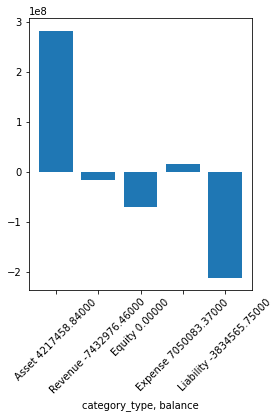

In [11]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(4,5)) 
chart = %sql select category_type, sum(balance) balance, sum(ytd_balance) from Scratch.trial_balance group by category_type 

chart.bar()